In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_network_colored(g, p, colors = 'default', fs = (8,4)):

    if colors == 'default': colors = {i:0 for i in g.nodes()}
    plt.figure(figsize = fs)
    nx.draw_networkx(g,
                     pos=p,
                     font_size = 12,
                     font_weight = 'bold',
                     font_color = 'plum',
                     edge_color = 'grey',
                     arrowsize = 20
                    )

    nodes = nx.draw_networkx_nodes(g, p,cmap=plt.get_cmap('Blues') ,node_color= [c for c in colors.values()],node_size = 300)
    nodes.set_edgecolor('lightgrey')
    plt.axis('off')
    plt.show()

C:\Users\corti\miniconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:315: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


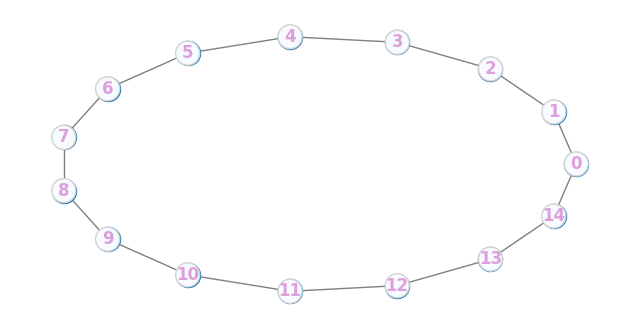

In [2]:
G_test1 = nx.cycle_graph(15)
layout = nx.circular_layout(G_test1)
draw_network_colored(G_test1,layout)


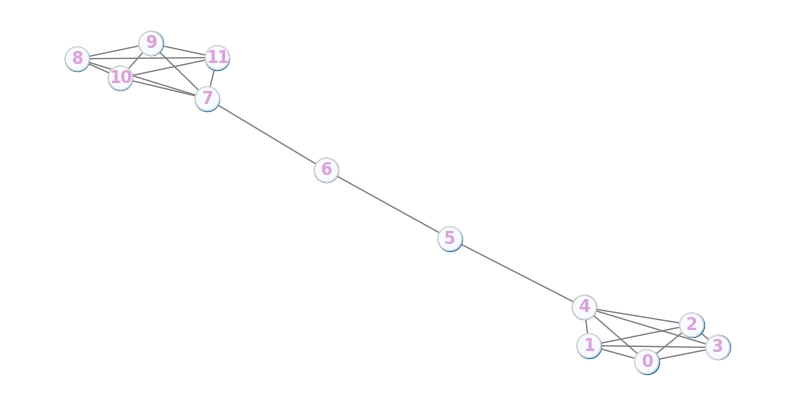

In [3]:
G_test2 = nx.barbell_graph(5,2)
layout = nx.spring_layout(G_test2)
draw_network_colored(G_test2,layout, fs = (10,5))

In [5]:
list(nx.bridges(G_test2))

[(4, 5), (5, 6), (6, 7)]

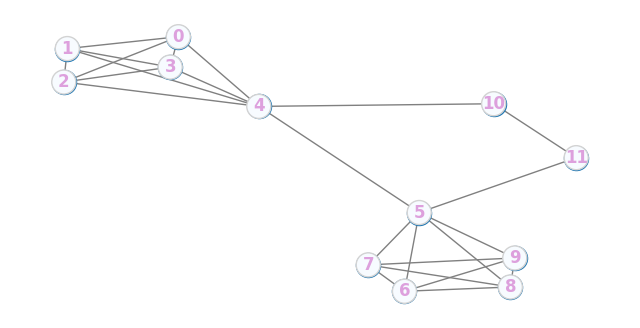

In [7]:
G_test3 = nx.barbell_graph(5,0)
G_test3.add_edges_from([(4,10),(10,11),(11,5)])
layout = nx.spring_layout(G_test3)
draw_network_colored(G_test3, layout)

In [8]:
nx.has_bridges(G_test3)


False

In [9]:
# Utility Functions
has_local_bridge = lambda G: len(list(nx.local_bridges(G)))>0
is_local_bridge = lambda G,edge: (edge[0],edge[1]) in nx.local_bridges(G, with_span = False) or (edge[1],edge[0]) in nx.local_bridges(G, with_span = False)


In [10]:
has_local_bridge(G_test3), is_local_bridge(G_test3,(5,4))

(True, True)

In [11]:
for u,v in G_test3.edges():

    neighbors_v = set(G_test3.neighbors(v))
    neighbors_u = set(G_test3.neighbors(u))

    den = len( neighbors_v.intersection(neighbors_u) )

    num = len( neighbors_v.union(neighbors_u) )

    overlap = den/num


    G_test3[u][v]['neighborhood_overlap'] = round(overlap,2)


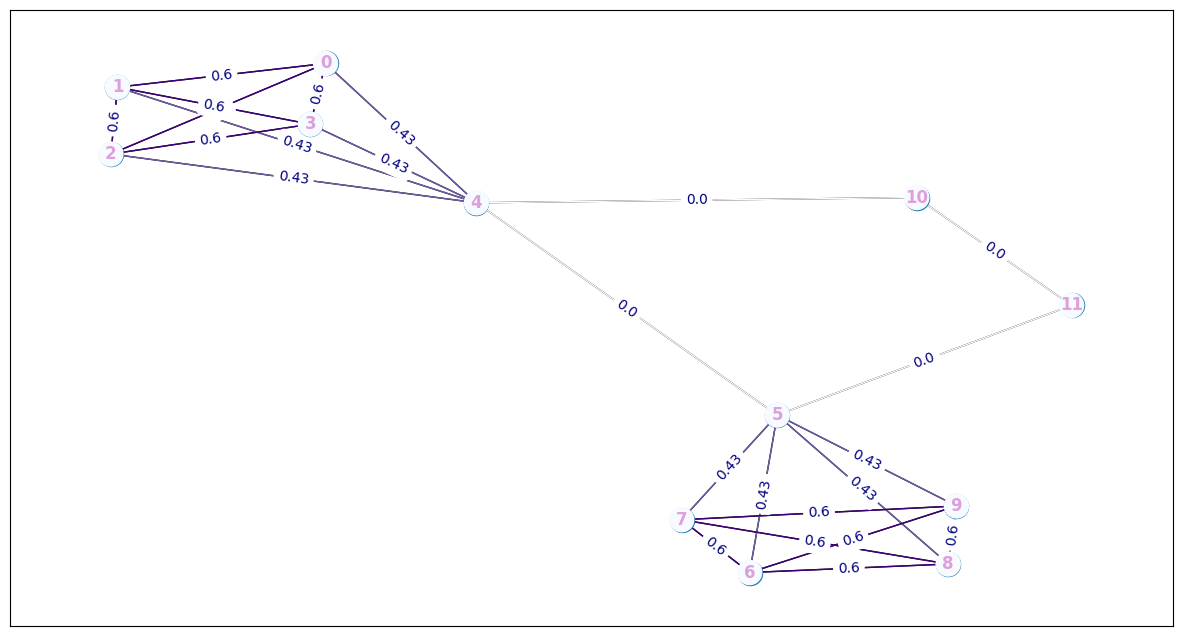

In [14]:
plt.figure(figsize = (15,8))
nx.draw_networkx(G_test3,
                 pos=layout,
                 font_size = 12,
                 font_weight = 'bold',
                 font_color = 'plum',
                 arrowsize = 20
                )

nodes = nx.draw_networkx_nodes(G_test3, layout,cmap=plt.get_cmap('Blues') ,node_color= [0]*G_test3.order(),node_size = 300)
nodes = nx.draw_networkx_edges(G_test3, layout ,edge_cmap=plt.get_cmap('Purples'),edge_color= [edge[2]['neighborhood_overlap'] for edge in G_test3.edges(data = True)])
nx.draw_networkx_edge_labels(
    G_test3, layout,
    edge_labels={(edge[0],edge[1]):edge[2]['neighborhood_overlap'] for edge in G_test3.edges(data = True)},
    font_color='navy'
)
plt.show()

In [15]:
# Esercizio



### Esercizio

* Creare un grafo dal file uc-social-undirected.gexf
* Qual è lo span maggiore?
* quanti sono i global bridge?
* quanti sono i local bridge?
* quali sono i bridge dallo span maggiore?

In [24]:
G = nx.read_gexf("../data/uc-social-undirected.gexf")

G.size(), G.order()

(6458, 1280)

In [26]:
local_bridges = list(nx.local_bridges(G))

In [28]:
max_span = max(local_bridges, key=lambda x: x[2])[2]
max_span

inf

In [29]:
len(local_bridges)

3242

In [30]:
bridges = list(nx.bridges(G))
len(bridges)

253